# sklearn-LDA

代码示例：https://mp.weixin.qq.com/s/hMcJtB3Lss1NBalXRTGZlQ （玉树芝兰） <br>
可视化：https://blog.csdn.net/qq_39496504/article/details/107125284  <br>
sklearn lda参数解读:https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html
<br>中文版参数解读：https://blog.csdn.net/TiffanyRabbit/article/details/76445909
<br>LDA原理-视频版：https://www.bilibili.com/video/BV1t54y127U8
<br>LDA原理-文字版：https://www.jianshu.com/p/5c510694c07e
<br>score的计算方法：https://github.com/scikit-learn/scikit-learn/blob/844b4be24d20fc42cc13b957374c718956a0db39/sklearn/decomposition/_lda.py#L729
<br>主题困惑度1：https://blog.csdn.net/weixin_43343486/article/details/109255165
<br>主题困惑度2：https://blog.csdn.net/weixin_39676021/article/details/112187210

# 情感分析

In [ ]:
import pandas as pd
import re
import jieba.posseg as psg
import numpy as np
# 去重，去除完全重复的数据
reviews = pd.read_excel(r"D:\python\lda\data\data3.xlsx")
reviews = reviews[['content']].drop_duplicates()
content = reviews['content']
reviews

In [ ]:
worker = lambda s : [[x.word,x.flag] for x in psg.cut(s)]   # 单词与词性
seg_word = content.apply(worker)
seg_word

In [ ]:
# 将词语转化为数据框形式，一列是词，一列是词语所在的句子id，最后一列是词语在该句子中的位置
 # 每一评论中词的个数
n_word = seg_word.apply(lambda x: len(x)) 
# 构造词语所在的句子id
n_content = [[x+1]*y for x,y in zip(list(seg_word.index), list(n_word))]
# 将嵌套的列表展开，作为词所在评论的id
index_content = sum(n_content, [])  
 
seg_word = sum(seg_word,[])
# 词
word = [x[0] for x in seg_word]
# 词性
nature = [x[1] for x in seg_word]
# content_type评论类型
 
# 构造数据框
result = pd.DataFrame({'index_content': index_content,
                      'word' : word,
                      'nature': nature})
 

In [ ]:
result = result[result['nature'] != 'x']
result

In [ ]:
stop_path = open("D:\python\lda\stop_dic\stopwords.txt",'r',encoding='utf-8')
stop = [x.replace('\n','') for x in stop_path.readlines()]
# 得到非停用词序列
word = list(set(word) - set(stop))
# 判断表格中的单词列是否在非停用词列中
result = result[result['word'].isin(word)]
result

In [ ]:
# 构造各词在评论中的位置列
n_word = list(result.groupby(by=['index_content'])['index_content'].count())
index_word = [list(np.arange(0,x)) for x in n_word]
index_word = sum(index_word,[])
result['index_word'] = index_word
result.reset_index(drop=True,inplace=True)

result

In [ ]:
# 构造各词在评论中的位置列
n_word = list(result.groupby(by=['index_content'])['index_content'].count())
index_word = [list(np.arange(0,x)) for x in n_word]
index_word = sum(index_word,[])
result['index_word'] = index_word
result.reset_index(drop=True,inplace=True)

result

In [ ]:
# 提取含名词的评论的句子id
ind = result[[x == 'n' for x in result['nature']]]['index_content'].unique()
# 提取评论
result = result[result['index_content'].isin(ind)]
# 重置索引
result.reset_index(drop=True,inplace=True)

result

### 负向评论

In [4]:
import jieba
import re
import wordcloud
import imageio
import matplotlib.pyplot as plt
 
with open("C:/Users/dell/评论.txt", encoding='utf-8') as f:
    data = f.read()
 
new_data = re.findall('[\u4e00-\u9fa5]+', data, re.S)
new_data = "/".join(new_data)
 
# 文本分词
seg_list_exact = jieba.cut(new_data, cut_all=True)
result_list = []
with open("D:\python\lda\stop_dic\stopwords.txt", encoding='utf-8') as f: #可根据需要打开停用词库，然后加上不想显示的词语
    con = f.readlines()
    stop_words = set()
    for i in con:
        i = i.replace("\n", "")   # 去掉读取每一行数据的\n
        stop_words.add(i)
 
for word in seg_list_exact:
    if word not in stop_words and len(word) > 1:
        result_list.append(word)
 
# 导入 imageio 库中的 imread 函数，并用这个函数读取本地图片，作为词云形状图片
py = imageio.imread("F:\项目\实验室项目(2023.12.6截止)（校级三等奖）\part2\mountain.png")  

excule=("青城","景区","景色","风景")
result_list=[w for w in result_list if  w not in excule]
 
# 词云图设置
wc = wordcloud.WordCloud(
        width=1000,         # 图片的宽
        max_words=500,
        height=700,         # 图片的高
        background_color='white',   # 图片背景颜色
        font_path='msyh.ttc',    # 词云字体
        mask=py,     # 所使用的词云图片
        scale=15,
        collocations=False,
        # contour_width=5,
        # contour_color='red'  # 轮廓颜色
)
# 给词云输入文字
data = ' '.join(result_list[:50000])
wc.generate(data)
# 词云图保存图片地址
wc.to_file('output5.png')
plt.figure(figsize=(20, 8))
plt.imshow(wc)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\dell\AppData\Local\Temp\jieba.cache
Loading model cost 0.619 seconds.
Prefix dict has been built successfully.
C:\Users\dell\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:1000: UserWarning: mask image should be unsigned byte between 0 and 255. Got a float array
  warnings.warn("mask image should be unsigned byte between 0"


In [ ]:
# from snownlp import SnowNLP
# sentence1 = '我爱机器学习，我爱文本挖掘！'
# s1 = SnowNLP(sentence1)
# s1.sentiments

In [ ]:
# sentence2 = '我不舒服，很愤怒'
# s2 = SnowNLP(sentence2)
# s2.sentiments

In [ ]:
from snownlp import SnowNLP
from snownlp import sentiment
import os
one_path = 'C:/Users/dell/Desktop'
os.chdir(one_path)
sentiment.train('neg.txt', 'pos.txt')
sentiment.save("sentiment.marshal")
print('这首歌真难听的情感得分是：',SnowNLP("这首歌真难听").sentiments)
print('今天天气真好啊的情感得分是：',SnowNLP("今天天气真好啊").sentiments)

In [ ]:
from snownlp import SnowNLP
print('这首歌真难听的情感得分是：',SnowNLP("这首歌真难听").sentiments)
print('今天天气真好啊的情感得分是：',SnowNLP("今天天气真好啊").sentiments)

In [5]:
from snownlp import sentiment
import os
# one_path = 'C:/Users/dell/Desktop'
# os.chdir(one_path)
# sentiment.train('neg.txt', 'pos.txt')
# sentiment.save("sentiment.marshal")

In [6]:
import pandas as pd
import re
import jieba.posseg as psg
import numpy as np


df = pd.read_excel(r"D:/python/lda/data/data3.xlsx")
text = df.content.iloc[0]
from snownlp import SnowNLP
s = SnowNLP(text)
s.sentiments

0.9995598091009656

In [7]:
df

,content
0,成都青城山的绿化覆盖率非常的高，尤其适宜避暑
1,问道青城山，拜水都江堰，世界历史文化遗产，值得推荐！
2,一个离成都比较近的冬天可看雪的道教名山哦。
3,峨眉天下秀，青城天下幽，多么好的形容，而且名符其实！去过青城山，进入山门就是别有一番风景，继...
4,青城山的整体规划应该很好，可惜现在还没有完全修好。现在高铁站出门就会有去到售票处的摆渡车，正...
...,...
2451,门票略贵。不亏道教祖庭，清幽险峻。感觉最高峰老君阁总在维修，只上去过一次，不过能看到整个成都...
2452,道教文化值得研究学习，独特文化内容
2453,景区收费交通太多，全程步行的话保证第二天瘫痪，山里的物价还算能接受，蚊子还是一样的毒。另外，...
2454,体验很好，景色不错，


In [8]:
df.to_excel(r"C:\Users\dell\Desktop\output5.xlsx")

In [9]:
s = []
for c in df['content']:
    score = SnowNLP(c).sentiments
    if score>=0.6:
        s.append(1)
    else:
        s.append(0)
count = np.sum((s == df['sentiment'])==0)
print('准确率为：',count/len(df))
#测试准确率


KeyError: 'sentiment'

In [10]:
import pandas as pd
df = pd.read_excel(r"F:\项目\实验室项目(2023.12.6截止)（校级三等奖）\part2\22.xlsx",index_col=0)
df=df.reset_index()
df

,content
0,很一般啊。海拔一千多米。上面就几个路边摊。吃东西的地方都没有。这辈子应该是不会再去了。
1,垃圾，想钱想疯了，不坐观光车你就必须得走几公里…
2,太牛逼了 自驾的直接给你引导到市区里面停车 强制坐观光车进景区
3,景色一般，没宣传的好，最差的是景区服务工作人员态度极差，前门入口竟然行李寄存关门谢客，卖票的...
4,根本不知道20块花了什么，接送车下来一直进路走到三门。，花了80上山，
...,...
3290,成都周边好去处。不过没想到氧吧里也有人抽烟，看到过几次，全是年轻人。希望景区加强管理。
3291,值得去旅游，非常棒！
3292,风景如画，空气清新自然，玩的开心快乐！
3293,值得一游，这里景色好美，空气非常好，让人心醉！


In [11]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3290     True
3291     True
3292     True
3293     True
3294     True
Length: 3295, dtype: bool

In [12]:
def get_sentiment_cn(text):
    s = SnowNLP(text)
    return s.sentiments
df["sentiment"] = df.content.apply(get_sentiment_cn)
pd.set_option('display.float_format',lambda x:'%.6f' % x)
#sentiment的取值大于等于0.6，可以判断为正面评价——积极情感，小于0.6，可以判断为负面评价——消极情感。
df1=df.drop_duplicates(subset=None, keep='first', inplace=False).reset_index(drop=True)
df1

,content,sentiment
0,很一般啊。海拔一千多米。上面就几个路边摊。吃东西的地方都没有。这辈子应该是不会再去了。,0.009987
1,垃圾，想钱想疯了，不坐观光车你就必须得走几公里…,0.000014
2,太牛逼了 自驾的直接给你引导到市区里面停车 强制坐观光车进景区,0.000018
3,景色一般，没宣传的好，最差的是景区服务工作人员态度极差，前门入口竟然行李寄存关门谢客，卖票的...,0.000000
4,根本不知道20块花了什么，接送车下来一直进路走到三门。，花了80上山，,0.000000
...,...,...
3182,青城天下幽，不负其名??我们一家人是从后山上的，找了当地的一个女娃娃导游，费用300，很敬业...,0.508792
3183,爬山的话?? 又能有多少特别有意思的事呢?? 山不是很高 我又是个青少年 所以大约一两个小时...,0.074984
3184,??体验很好，有趣好玩，,0.999688
3185,青城山，道教的发源地，四山之首……很有文化，人法地，地法天，天法道，道法自然，即存在决定本质...,0.000022


In [13]:
# pd.set_option('display.float_format',lambda x:'%.6f' % x)
# #sentiment的取值大于等于0.5，可以判断为正面评价——积极情感，小于0.5，可以判断为负面评价——消极情感。
# df1=df.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False).reset_index(drop=True)
# df1

In [14]:
df2=df1['sentiment']
df2

0      0.009987
1      0.000014
2      0.000018
3      0.000000
4      0.000000
         ...   
3182   0.508792
3183   0.074984
3184   0.999688
3185   0.000022
3186   1.000000
Name: sentiment, Length: 3187, dtype: float64

In [16]:
list_evaluate=[]
for i, v in df2.iteritems():
  if v >=0.6:
    list_evaluate.append('正向评论')
  else:
    list_evaluate.append('负向评论')
# print(list_evaluate)
df3 = pd.DataFrame(list_evaluate)
df4=pd.concat([df1, df3], axis=1, join='outer',ignore_index=True)
df4.columns =['content','sentiment','评论类型']
df4

,content,sentiment,评论类型
0,很一般啊。海拔一千多米。上面就几个路边摊。吃东西的地方都没有。这辈子应该是不会再去了。,0.009987,负向评论
1,垃圾，想钱想疯了，不坐观光车你就必须得走几公里…,0.000014,负向评论
2,太牛逼了 自驾的直接给你引导到市区里面停车 强制坐观光车进景区,0.000018,负向评论
3,景色一般，没宣传的好，最差的是景区服务工作人员态度极差，前门入口竟然行李寄存关门谢客，卖票的...,0.000000,负向评论
4,根本不知道20块花了什么，接送车下来一直进路走到三门。，花了80上山，,0.000000,负向评论
...,...,...,...
3182,青城天下幽，不负其名??我们一家人是从后山上的，找了当地的一个女娃娃导游，费用300，很敬业...,0.508792,负向评论
3183,爬山的话?? 又能有多少特别有意思的事呢?? 山不是很高 我又是个青少年 所以大约一两个小时...,0.074984,负向评论
3184,??体验很好，有趣好玩，,0.999688,正向评论
3185,青城山，道教的发源地，四山之首……很有文化，人法地，地法天，天法道，道法自然，即存在决定本质...,0.000022,负向评论


In [17]:
df5=df4[df4['评论类型']=='正向评论']
df5.to_excel(r"C:\Users\dell\Desktop\正向.xlsx",encoding='utf-8')
df5

,content,sentiment,评论类型
6,后山离前山远死了，各位真想玩青城山还是爬前山吧，前山还不错，去还看见松鼠🐿️,0.723081,正向评论
22,风景很好看，空气也很清新，拍照也很好看，但是真的太累了，我这辈子都没这么累过，青城山后山，爬...,0.925329,正向评论
29,青城山幽 哈哈哈 三十多年 从小到大都在爬的山,0.996026,正向评论
38,这个旅游景点太商业化,0.764779,正向评论
67,人太多啦，缆车等了2个小时，好累哦,0.866432,正向评论
...,...,...,...
3179,太累了青城山 爬的要死?? 也没什么好看的风景 不太推荐去 可能比较适合问道的人去 没有信仰...,0.974926,正向评论
3180,非常好 ??不错不错,0.999128,正向评论
3181,景色比较不错 适合喜欢爬山的朋友 最高1260老君老君阁??,0.999795,正向评论
3184,??体验很好，有趣好玩，,0.999688,正向评论


In [18]:
df6=df4[df4['评论类型']=='负向评论']
# pd.set_option('display.float_format',lambda x:'%.6f' % x)
df6.to_excel(r"C:\Users\dell\Desktop\负向.xlsx",encoding='utf-8')
df6

,content,sentiment,评论类型
0,很一般啊。海拔一千多米。上面就几个路边摊。吃东西的地方都没有。这辈子应该是不会再去了。,0.009987,负向评论
1,垃圾，想钱想疯了，不坐观光车你就必须得走几公里…,0.000014,负向评论
2,太牛逼了 自驾的直接给你引导到市区里面停车 强制坐观光车进景区,0.000018,负向评论
3,景色一般，没宣传的好，最差的是景区服务工作人员态度极差，前门入口竟然行李寄存关门谢客，卖票的...,0.000000,负向评论
4,根本不知道20块花了什么，接送车下来一直进路走到三门。，花了80上山，,0.000000,负向评论
...,...,...,...
3175,千年古刹?? 很有千年道场的底蕴?? ??听听导游的解说?? ??非常长知识??,0.001021,负向评论
3177,人太多了，坐个缆车排队一个多小时，山上开发的过度了些，没什么特别的，可能是因为特殊时期的原因...,0.000011,负向评论
3182,青城天下幽，不负其名??我们一家人是从后山上的，找了当地的一个女娃娃导游，费用300，很敬业...,0.508792,负向评论
3183,爬山的话?? 又能有多少特别有意思的事呢?? 山不是很高 我又是个青少年 所以大约一两个小时...,0.074984,负向评论


### 正向评论

In [19]:
df7 = pd.read_excel(r"D:\python\lda\data\data3.xlsx")
text2 = df.content.iloc[0]
from snownlp import SnowNLP
s = SnowNLP(text2)
s.sentiments

0.00998659717783279

In [20]:
def get_sentiment_cn(text2):
    s = SnowNLP(text2)
    return s.sentiments
df7["sentiment"] = df7.content.apply(get_sentiment_cn)

In [21]:
pd.set_option('display.float_format',lambda x:'%.6f' % x)
#sentiment的取值大于等于0.5，可以判断为正面评价——积极情感，小于0.5，可以判断为负面评价——消极情感。
df8=df7.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False).reset_index(drop=True)
df8

,content,sentiment
0,成都青城山的绿化覆盖率非常的高，尤其适宜避暑,0.999560
1,问道青城山，拜水都江堰，世界历史文化遗产，值得推荐！,1.000000
2,一个离成都比较近的冬天可看雪的道教名山哦。,0.998911
3,峨眉天下秀，青城天下幽，多么好的形容，而且名符其实！去过青城山，进入山门就是别有一番风景，继...,1.000000
4,青城山的整体规划应该很好，可惜现在还没有完全修好。现在高铁站出门就会有去到售票处的摆渡车，正...,0.301280
...,...,...
2221,门票略贵。不亏道教祖庭，清幽险峻。感觉最高峰老君阁总在维修，只上去过一次，不过能看到整个成都...,0.002511
2222,道教文化值得研究学习，独特文化内容,0.983967
2223,景区收费交通太多，全程步行的话保证第二天瘫痪，山里的物价还算能接受，蚊子还是一样的毒。另外，...,0.163253
2224,体验很好，景色不错，,0.999730


In [24]:
df9=df8['sentiment']
df9

0      0.999560
1      1.000000
2      0.998911
3      1.000000
4      0.301280
         ...   
2221   0.002511
2222   0.983967
2223   0.163253
2224   0.999730
2225   0.999936
Name: sentiment, Length: 2226, dtype: float64

In [25]:
list_evaluates=[]
for i, v in df9.iteritems():
  if v >=0.6:
    list_evaluates.append('正向评论')
  else:
    list_evaluates.append('负向评论')
# print(list_evaluate)
df10 = pd.DataFrame(list_evaluates)
df11=pd.concat([df8, df10], axis=1, join='outer',ignore_index=True)
df11.columns =['content','sentiment','评论类型']
df11

,content,sentiment,评论类型
0,成都青城山的绿化覆盖率非常的高，尤其适宜避暑,0.999560,正向评论
1,问道青城山，拜水都江堰，世界历史文化遗产，值得推荐！,1.000000,正向评论
2,一个离成都比较近的冬天可看雪的道教名山哦。,0.998911,正向评论
3,峨眉天下秀，青城天下幽，多么好的形容，而且名符其实！去过青城山，进入山门就是别有一番风景，继...,1.000000,正向评论
4,青城山的整体规划应该很好，可惜现在还没有完全修好。现在高铁站出门就会有去到售票处的摆渡车，正...,0.301280,负向评论
...,...,...,...
2221,门票略贵。不亏道教祖庭，清幽险峻。感觉最高峰老君阁总在维修，只上去过一次，不过能看到整个成都...,0.002511,负向评论
2222,道教文化值得研究学习，独特文化内容,0.983967,正向评论
2223,景区收费交通太多，全程步行的话保证第二天瘫痪，山里的物价还算能接受，蚊子还是一样的毒。另外，...,0.163253,负向评论
2224,体验很好，景色不错，,0.999730,正向评论


In [26]:
df12=df11[df11['评论类型']=='正向评论']
df12

,content,sentiment,评论类型
0,成都青城山的绿化覆盖率非常的高，尤其适宜避暑,0.999560,正向评论
1,问道青城山，拜水都江堰，世界历史文化遗产，值得推荐！,1.000000,正向评论
2,一个离成都比较近的冬天可看雪的道教名山哦。,0.998911,正向评论
3,峨眉天下秀，青城天下幽，多么好的形容，而且名符其实！去过青城山，进入山门就是别有一番风景，继...,1.000000,正向评论
5,对非四川人而言相当不错！,0.973814,正向评论
...,...,...,...
2218,青城天下幽！徒步爬上老君阁，沿途风景尽收于眼。。。小伙伴五人历时三小时，都赞不虚此行！一边是...,0.972587,正向评论
2219,￼体验很好，有趣好玩，,0.999938,正向评论
2222,道教文化值得研究学习，独特文化内容,0.983967,正向评论
2224,体验很好，景色不错，,0.999730,正向评论


In [27]:
df13=df11[df11['评论类型']=='负向评论']
# pd.set_option('display.float_format',lambda x:'%.6f' % x)
df13

,content,sentiment,评论类型
4,青城山的整体规划应该很好，可惜现在还没有完全修好。现在高铁站出门就会有去到售票处的摆渡车，正...,0.301280,负向评论
13,青城山是成都名山，这边可以说是成都的后花园了，青城山共分为两个部分，前山跟后山，前三的门票8...,0.165771,负向评论
59,道家名山，自带仙气，满目苍翠，爬的累了可以坐索道，小时候热爱武侠的小伙伴一定要来看一下呀，坐...,0.434162,负向评论
60,和前山相比后山更加自然，夏天来的话是很好的，冬天很多河道有点枯，水流不多不大，后山是可以开车...,0.013737,负向评论
61,前山路挺多的，很多岔道，想去的小伙伴可以多看看地图走😂不然要走冤枉路例如我😂寄存东西的话，取...,0.000000,负向评论
...,...,...,...
2208,上海身份证的朋友注意了，为了感谢上海对都江堰青城山的灾后援助，所以凭上海身份证可以享受半价门...,0.000000,负向评论
2212,如果不是虔诚的道教信众，建议到了道观里不要随便拜拜，切记！ 宗教局应该更加规范管理才比较好。...,0.059810,负向评论
2220,青城山之行有点坎坷😂跟朋友约的成都集合，然后租了车原计划自驾到青城山，都江堰，再去色达。然而...,0.000012,负向评论
2221,门票略贵。不亏道教祖庭，清幽险峻。感觉最高峰老君阁总在维修，只上去过一次，不过能看到整个成都...,0.002511,负向评论


# LDA模型

## 1.预处理

In [33]:
import os
import pandas as pd
import re
import jieba
import jieba.posseg as psg

In [34]:
output_path = 'D:/python/lda/result'
file_path = 'D:/python/lda/data'
os.chdir(file_path)
data=pd.read_excel("负向.xlsx")#content type
print(data)
os.chdir(output_path)
dic_file = "D:/python/lda/stop_dic/dict.txt"
stop_file = "D:/python/lda/stop_dic/stopwords.txt"

     Unnamed: 0                                            content  sentiment  \
0             0        很一般啊。海拔一千多米。上面就几个路边摊。吃东西的地方都没有。这辈子应该是不会再去了。   0.009987   
1             1                           垃圾，想钱想疯了，不坐观光车你就必须得走几公里…   0.000014   
2             2                    太牛逼了 自驾的直接给你引导到市区里面停车 强制坐观光车进景区   0.000018   
3             3  景色一般，没宣传的好，最差的是景区服务工作人员态度极差，前门入口竟然行李寄存关门谢客，卖票的...   0.000000   
4             4                根本不知道20块花了什么，接送车下来一直进路走到三门。，花了80上山，   0.000000   
..          ...                                                ...        ...   
806        3175           千年古刹?? 很有千年道场的底蕴?? ??听听导游的解说?? ??非常长知识??   0.001021   
807        3177  人太多了，坐个缆车排队一个多小时，山上开发的过度了些，没什么特别的，可能是因为特殊时期的原因...   0.000011   
808        3182  青城天下幽，不负其名??我们一家人是从后山上的，找了当地的一个女娃娃导游，费用300，很敬业...   0.508792   
809        3183  爬山的话?? 又能有多少特别有意思的事呢?? 山不是很高 我又是个青少年 所以大约一两个小时...   0.074984   
810        3185  青城山，道教的发源地，四山之首……很有文化，人法地，地法天，天法道，道法自然，即存在决定本质...   0.000022   

     评论类型  
0    负向评论  
1  

In [35]:
def chinese_word_cut(mytext):
    jieba.load_userdict(dic_file)
    jieba.initialize()  #手工初始化jieba库
    try:
        stopword_list = open(stop_file,encoding ='utf-8')
    except:
        stopword_list = []
        print("error in stop_file")
    stop_list = []
    flag_list = ['n','a','vn']
    for line in stopword_list:  #遍历每一个停用词
        line = re.sub(u'\n|\\r', '', line)
        stop_list.append(line)
#         print(line)
    
    word_list = []
    #jieba分词
    seg_list = psg.cut(mytext)
#     print(seg_list)
    for seg_word in seg_list:
        word = re.sub(u'[^\u4e00-\u9fa5]','',seg_word.word)
        #word = seg_word.word  #如果想要分析英语文本，注释这行代码，启动下行代码
        find = 0
        for stop_word in stop_list:
            if stop_word == word or len(word)<2:     #this word is stopword
                    find = 1
                    break
        if find == 0 and seg_word.flag in flag_list:
            word_list.append(word)      
    return (" ").join(word_list)
    print(word_list)

In [36]:
data["content_cutted"] = data.content.apply(chinese_word_cut)
data

,Unnamed: 0,content,sentiment,评论类型,content_cutted
0,0,很一般啊。海拔一千多米。上面就几个路边摊。吃东西的地方都没有。这辈子应该是不会再去了。,0.009987,负向评论,海拔 路边摊 地方
1,1,垃圾，想钱想疯了，不坐观光车你就必须得走几公里…,0.000014,负向评论,垃圾 观光车
2,2,太牛逼了 自驾的直接给你引导到市区里面停车 强制坐观光车进景区,0.000018,负向评论,太牛 市区 观光车 景区
3,3,景色一般，没宣传的好，最差的是景区服务工作人员态度极差，前门入口竟然行李寄存关门谢客，卖票的...,0.000000,负向评论,景色 宣传 最差 景区 服务 工作人员 态度 极差 前门 行李 关门 卖票 卖票 办公室 工...
4,4,根本不知道20块花了什么，接送车下来一直进路走到三门。，花了80上山，,0.000000,负向评论,根本 接送车
...,...,...,...,...,...
806,3175,千年古刹?? 很有千年道场的底蕴?? ??听听导游的解说?? ??非常长知识??,0.001021,负向评论,古刹 道场 底蕴 导游
807,3177,人太多了，坐个缆车排队一个多小时，山上开发的过度了些，没什么特别的，可能是因为特殊时期的原因...,0.000011,负向评论,缆车 排队 小时 过度 特殊 时期 原因 管理 感觉
808,3182,青城天下幽，不负其名??我们一家人是从后山上的，找了当地的一个女娃娃导游，费用300，很敬业...,0.508792,负向评论,一家人 女娃娃 导游 费用 敬业 山顶
809,3183,爬山的话?? 又能有多少特别有意思的事呢?? 山不是很高 我又是个青少年 所以大约一两个小时...,0.074984,负向评论,爬山 小时 部分 建筑


In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [40]:
def print_top_words(model, feature_names, n_top_words):
    tword = []
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % (topic_idx+1))
        topic_w = " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
        tword.append(topic_w)
        print(topic_w)
    return tword


In [41]:
n_features = 1000  #提取2000个特征词语

stpwrd_dic = open(stop_file, 'rb')
stpwrd_content = stpwrd_dic.read().decode('utf-8')#将停用词表转换为list
stpwrdlst = stpwrd_content.splitlines()
stpwrd_dic.close()
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',   # 创建词袋数据结构,将文本中的词语转换为词频矩阵
                                max_features=n_features,
#                                 stop_words=stpwrdlst,
                                stop_words='english',
                                max_df = 0.5,
                                min_df = 10)
# print(data.content_cutted) #分词结果
tf = tf_vectorizer.fit_transform(data.content_cutted)  # 利用训练数据训练模型，并返回训练数据的主题分布
# print(tf)
# print(tf_vectorizer.get_feature_names())

In [42]:
n_topics = 4
lda = LatentDirichletAllocation(n_components=n_topics, max_iter=50,
                                learning_method='online',
                                learning_offset=50,
#                                 doc_topic_prior=0.1,
#                                 topic_word_prior=0.01,
                               random_state=0)
lda.fit(tf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='online', learning_offset=50,
             max_doc_update_iter=100, max_iter=50, mean_change_tol=0.001,
             n_components=4, n_jobs=1, n_topics=None, perp_tol=0.1,
             random_state=0, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

### 2.1输出每个主题对应词语 

In [43]:
n_top_words = 10
tf_feature_names = tf_vectorizer.get_feature_names()
topic_word = print_top_words(lda, tf_feature_names, n_top_words)

Topic #1:
缆车 景区 小时 景色 不错 排队 体验 感觉 步行 电瓶车
Topic #2:
前山 爬山 道观 时间 景点 风景 门票 景色 小时 有点
Topic #3:
方便 导游 携程 行程 买票 身份证 服务 时间 交通 景点
Topic #4:
景区 建议 观光车 停车场 游客 门票 地方 走路 收费 景点


In [44]:
tt_matrix = lda.components_
id = 0
vocs=tf_vectorizer.get_feature_names()
dict1=[]
for tt_m in tt_matrix:
    tt_dict = [(name, tt) for name, tt in zip(vocs, tt_m)]
    tt_dict = sorted(tt_dict, key=lambda x: x[1], reverse=True)
    # 打印权重值大于0.6的主题词：
    # tt_dict = [tt_threshold for tt_threshold in tt_dict if tt_threshold[1] > 0.6]
    # 打印每个类别前5个主题词：
    tt_dict = tt_dict[:15]
    dict1.append(tt_dict)
#     print('Topic #%d:' % (id+1), tt_dict,'\n')
    id += 1
# 打印每个主题TOP20单词并输出每个单词的主题权重值

In [45]:
a=dict1[0]
b=dict1[1]
c=dict1[2]
er1=dict1[3]
# er2=dict1[4]
# er3=dict1[5]
# er4=dict1[6]

d=[]
e=[]
x=[]
y=[]
p=[]
q=[]
d1=[]
e1=[]
# x1=[]
# y1=[]
# p1=[]
# q1=[]
# d2=[]
# e2=[]

for i in a:
    one=i[0]
    two=i[1]
    d.append(one)
    e.append(two)
for j in b:
    one=j[0]
    two=j[1]
    x.append(one)
    y.append(two)
for k in c:
    one=k[0]
    two=k[1]
    p.append(one)
    q.append(two)
for i in er1:
    one=i[0]
    two=i[1]
    d1.append(one)
    e1.append(two)
# for j in er2:
#     one=j[0]
#     two=j[1]
#     x1.append(one)
#     y1.append(two)
# for k in er3:
#     one=k[0]
#     two=k[1]
#     p1.append(one)
#     q1.append(two)
# for i in er4:
#     one=i[0]
#     two=i[1]
#     d2.append(one)
#     e2.append(two)



### 2.2输出每篇文章对应主题 

In [46]:
from pandas.core.frame import DataFrame
f={"a" : d,
   "b" : e,
   "c" : x,
   "d" : y,
   "e" : p,
   "f" : q,
   "g" : d1,
   "z" : e1,
#    "h" : x1,
#    "i" : y1,
#    "j" : p1,
#    "k" : q1,
#    "l" : d2,
#    "m" : e2
  }#将列表d，e转换成字典
data1=DataFrame(f)#将字典转换成为数据框

# data.columns =['Topic #1','主题权重值','Topic #2','主题权重值','Topic #3','主题权重值']
data1

,a,b,c,d,e,f,g,z
0,缆车,147.213412,前山,161.088153,方便,77.573453,景区,211.354760
1,景区,115.105775,爬山,81.439050,导游,60.447712,建议,124.060824
2,小时,90.275915,道观,63.025331,携程,37.783798,观光车,114.275958
3,景色,66.905561,时间,62.145139,行程,30.878602,停车场,62.330028
4,不错,61.319130,景点,49.257379,买票,28.091085,游客,58.340027
5,排队,57.048554,风景,48.667351,身份证,26.162929,门票,52.093352
6,体验,51.546512,门票,47.369809,服务,22.202731,地方,43.352498
7,感觉,49.442757,景色,44.503069,时间,21.937720,走路,41.626493
8,步行,43.375116,小时,43.700912,交通,20.445523,收费,31.514456
9,电瓶车,38.405913,有点,37.470847,景点,20.406263,景点,30.102512


In [47]:
import numpy as np

In [48]:
topics=lda.transform(tf)
topics

array([[0.13421149, 0.12942285, 0.13105133, 0.60531433],
       [0.12500142, 0.12500151, 0.12500243, 0.62499464],
       [0.37586314, 0.06250578, 0.06251069, 0.4991204 ],
       ...,
       [0.06824546, 0.30804768, 0.56120283, 0.06250403],
       [0.09433699, 0.7378628 , 0.08333779, 0.08446243],
       [0.12500482, 0.62376666, 0.12622293, 0.12500558]])

In [49]:
topic = []
for t in topics:
    topic.append("Topic #"+str(list(t).index(np.max(t))))
data['概率最大的主题序号']=topic
data['每个主题对应概率']=list(topics)
data.to_excel("data_topic2.xlsx",index=False)
data

,Unnamed: 0,content,sentiment,评论类型,content_cutted,概率最大的主题序号,每个主题对应概率
0,0,很一般啊。海拔一千多米。上面就几个路边摊。吃东西的地方都没有。这辈子应该是不会再去了。,0.009987,负向评论,海拔 路边摊 地方,Topic #3,"[0.13421148840458624, 0.12942284640979493, 0.1..."
1,1,垃圾，想钱想疯了，不坐观光车你就必须得走几公里…,0.000014,负向评论,垃圾 观光车,Topic #3,"[0.12500142427545446, 0.1250015055921599, 0.12..."
2,2,太牛逼了 自驾的直接给你引导到市区里面停车 强制坐观光车进景区,0.000018,负向评论,太牛 市区 观光车 景区,Topic #3,"[0.37586313678422734, 0.06250577778124414, 0.0..."
3,3,景色一般，没宣传的好，最差的是景区服务工作人员态度极差，前门入口竟然行李寄存关门谢客，卖票的...,0.000000,负向评论,景色 宣传 最差 景区 服务 工作人员 态度 极差 前门 行李 关门 卖票 卖票 办公室 工...,Topic #3,"[0.014438200442078629, 0.014202905819125653, 0..."
4,4,根本不知道20块花了什么，接送车下来一直进路走到三门。，花了80上山，,0.000000,负向评论,根本 接送车,Topic #3,"[0.12634915546228734, 0.12501154564344308, 0.1..."
...,...,...,...,...,...,...,...
806,3175,千年古刹?? 很有千年道场的底蕴?? ??听听导游的解说?? ??非常长知识??,0.001021,负向评论,古刹 道场 底蕴 导游,Topic #2,"[0.1250011437351437, 0.1250011524897056, 0.624..."
807,3177,人太多了，坐个缆车排队一个多小时，山上开发的过度了些，没什么特别的，可能是因为特殊时期的原因...,0.000011,负向评论,缆车 排队 小时 过度 特殊 时期 原因 管理 感觉,Topic #0,"[0.8737259689300868, 0.04243507983669223, 0.04..."
808,3182,青城天下幽，不负其名??我们一家人是从后山上的，找了当地的一个女娃娃导游，费用300，很敬业...,0.508792,负向评论,一家人 女娃娃 导游 费用 敬业 山顶,Topic #2,"[0.06824545899159794, 0.3080476836582032, 0.56..."
809,3183,爬山的话?? 又能有多少特别有意思的事呢?? 山不是很高 我又是个青少年 所以大约一两个小时...,0.074984,负向评论,爬山 小时 部分 建筑,Topic #1,"[0.09433698593607616, 0.737862796941312, 0.083..."


In [50]:
topics[1]

array([0.12500142, 0.12500151, 0.12500243, 0.62499464])

### 2.3可视化 

In [52]:
import pyLDAvis
import pyLDAvis.sklearn

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\manifold\t_sne.py:420: DeprecationWarning: invalid escape sequence \s
  """


In [60]:
pyLDAvis.enable_notebook()
pic = pyLDAvis.sklearn.prepare(lda, tf, tf_vectorizer)
pyLDAvis.display(pic)
pyLDAvis.save_html(pic,"lda2（附件）.html")
#去工作路径下找保存好的html文件
#和视频里讲的不一样，目前这个代码不需要手动中断运行，可以快速出结果

### 2.4困惑度 

In [54]:
import matplotlib.pyplot as plt

In [55]:
plexs = []
scores = []
n_max_topics = 16
for i in range(1,n_max_topics):
    print(i)
    lda = LatentDirichletAllocation(n_components=i, max_iter=50,
                                    learning_method='online',
                                    learning_offset=50,random_state=0)
    lda.fit(tf)
    plexs.append(lda.perplexity(tf))
    scores.append(lda.score(tf))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


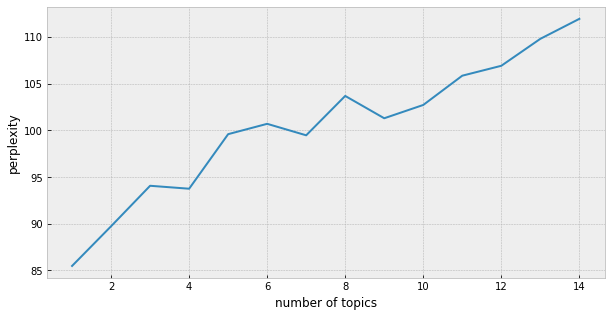

In [56]:
plt.style.use('bmh')
plt.figure(figsize=(10, 5))
n_t=14#区间最右侧的值。注意：不能大于n_max_topics
x=list(range(1,n_t+1))
plt.plot(x,plexs[0:n_t])
plt.xlabel("number of topics")
plt.ylabel("perplexity")
plt.show()

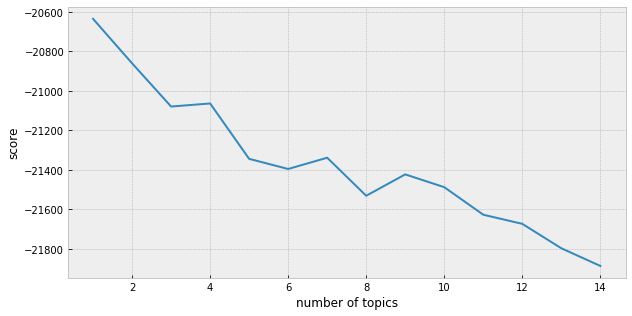

In [57]:
plt.style.use('bmh')
plt.figure(figsize=(10, 5))
n_t=14#区间最右侧的值。注意：不能大于n_max_topics
x=list(range(1,n_t+1))
plt.plot(x,scores[0:n_t])
plt.xlabel("number of topics")
plt.ylabel("score")
plt.show()